# import

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
import re

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

# config

In [3]:
warnings.filterwarnings("ignore")
sns.set()

INPUT = "../data/input"
OUTPUT = "../data/output"
NAME = "baseline003"

# data

In [4]:
data_train = pd.read_csv(os.path.join(INPUT, "train.csv"))
data_test = pd.read_csv(os.path.join(INPUT, "test.csv"))
data = pd.concat([data_train, data_test], ignore_index=True)

In [5]:
# 欠損値の除去
data["Age"].fillna(data["Age"].mean(), inplace=True)
data["Fare"].fillna(data["Fare"].mean(), inplace=True)
data.drop('Cabin', axis=1, inplace=True)
data["Embarked"].fillna("S", inplace=True)

# eda

In [6]:
data.head()

,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,1.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,0.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,0.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,0.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,1.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [7]:
def show_scatterplot(input_df, x, y, hue=None, reg=True, title=None):
    plt.figure(figsize=(8, 6))
    if hue is not None:
        input_df = input_df.sort_values(hue)
    if reg:
        sns.regplot(x=x, y=y, data=input_df, scatter=False,color="red", )
    sns.scatterplot(data=input_df,x=x, y=y, hue=hue, s=200, palette='Set1', alpha=0.5)
    if title is not None:
        plt.title(title)
    plt.show()

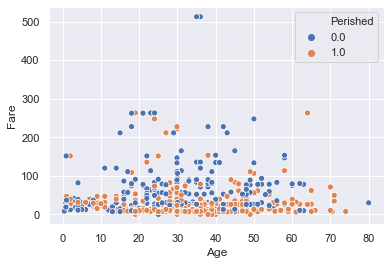

In [8]:
sns.scatterplot(x="Age", y="Fare", data=data, hue="Perished")

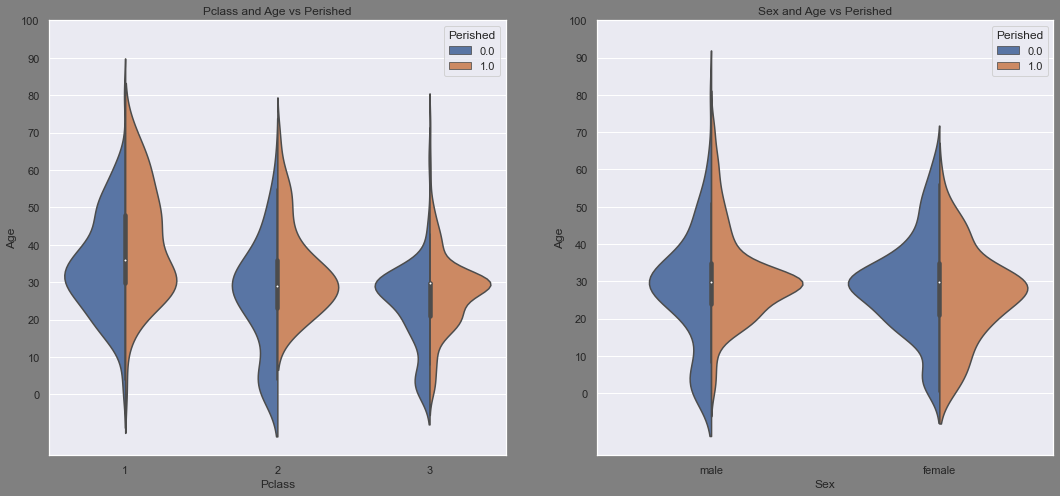

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8), facecolor='gray')
sns.violinplot("Pclass","Age", hue="Perished", data=data,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Perished')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Perished", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Perished')
ax[1].set_yticks(range(0,110,10))
plt.show()

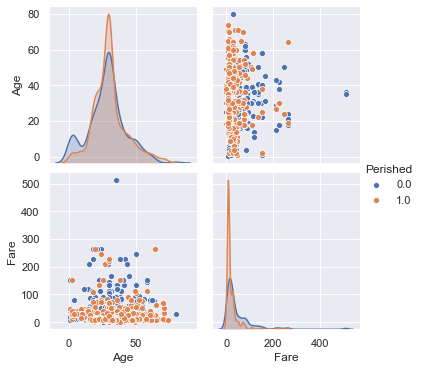

In [10]:
sns.pairplot(data[["Age", "Fare", "Perished"]], hue="Perished")

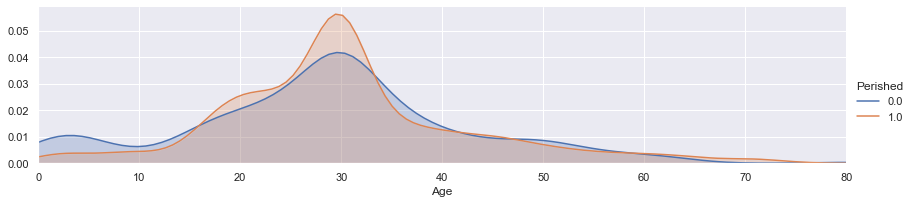

In [11]:
fig = sns.FacetGrid(data, hue='Perished', aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
max_value = data['Age'].max()
fig.set(xlim=(0,max_value))
fig.add_legend()

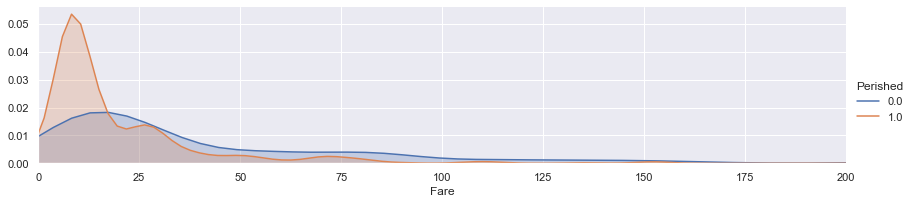

In [12]:
fig = sns.FacetGrid(data, hue='Perished', aspect=4)
fig.map(sns.kdeplot, 'Fare', shade=True)
max_value = data['Fare'].max()
fig.set(xlim=(0,200))
fig.add_legend()

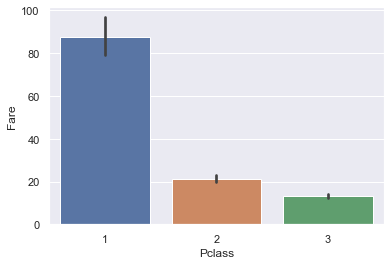

In [13]:
sns.barplot(x="Pclass", y="Fare", data=data)

In [14]:
data.head()

,PassengerId,Perished,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,1.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,0.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,0.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,0.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,1.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [29]:
def get_title(name):
    title_search = re.search('([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

In [30]:
data["title"] = data["Name"].apply(get_title)

In [31]:
data["title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Ms            2
Major         2
Mlle          2
Don           1
Countess      1
Lady          1
Dona          1
Jonkheer      1
Sir           1
Capt          1
Mme           1
Name: title, dtype: int64

In [32]:
data["title"] = data["title"].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

data["title"] = data["title"].replace('Mlle', 'Miss')
data["title"] = data["title"].replace('Ms', 'Miss')
data["title"] = data["title"].replace('Mme', 'Mrs')

In [33]:
data["title"].value_counts()

Mr        757
Miss      264
Mrs       198
Master     61
Rare       29
Name: title, dtype: int64